In [1]:
from io import BytesIO

import torch

import PIL
import requests
from diffusers import RePaintPipeline, RePaintScheduler


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/repaint/celeba_hq_256.png"
mask_url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/repaint/mask_256.png"

# Load the original image and the mask as PIL images
original_image = download_image(img_url).resize((256, 256))
mask_image = download_image(mask_url).resize((256, 256))

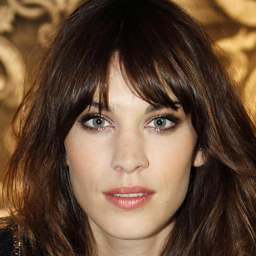

In [2]:
original_image

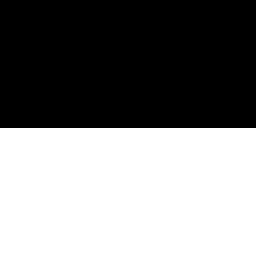

In [3]:
mask_image

In [4]:
# Load the RePaint scheduler and pipeline based on a pretrained DDPM model
scheduler = RePaintScheduler.from_pretrained("google/ddpm-ema-celebahq-256")
pipe = RePaintPipeline.from_pretrained("google/ddpm-ema-celebahq-256", scheduler=scheduler)
pipe = pipe.to("cuda")

generator = torch.Generator(device="cuda").manual_seed(0)
output = pipe(
    original_image=original_image,
    mask_image=mask_image,
    num_inference_steps=250,
    eta=0.0,
    jump_length=10,
    jump_n_sample=10,
    generator=generator,
)
inpainted_image = output.images[0]

Downloading:   0%|          | 0.00/256 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/790 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455M [00:00<?, ?B/s]

  0%|          | 0/4570 [00:00<?, ?it/s]

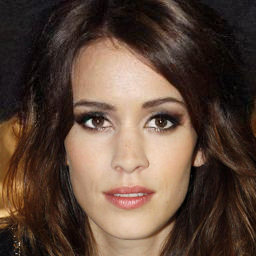

In [7]:
inpainted_image

In [ ]:
filename = (f'woman-{seed}-ninf{num_inference_steps}.png')
filename = filename.replace('<', '-').replace('>', '-')

image.save(os.path.join('outputs/inpainting/guinea_pig/', filename))

In [8]:
output_old = pipe(
    original_image=original_image,
    mask_image=mask_image,
    num_inference_steps=250,
    eta=0.0,
    jump_length=10,
    jump_n_sample=10,
    generator=generator,
    diffuse_with_predicted_noise=False,
)
inpainted_image_old = output.images[0]

  0%|          | 0/4570 [00:00<?, ?it/s]

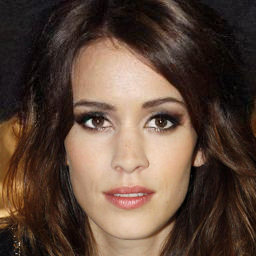

In [9]:
inpainted_image_old